<a href="https://colab.research.google.com/github/Feru34/Proyecto_Deep_Learning/blob/main/resources/Proyecto_1_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install ultralytics==8.2.98

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.7/235.7 GB disk)


In [ ]:
import pandas as pd
import numpy as np

import os
import os.path as osp
import random
import re
import shutil

#Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from IPython.display import display, Image

from numpy import asarray

from PIL import Image

from ultralytics import YOLO

In [ ]:

!kaggle datasets list

ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset           Customer Shopping (Latest Trends) Dataset       76KB  2024-11-23 15:26:12           2816         46  1.0              
ikynahidwin/depression-student-dataset                        Depression Student Dataset                       4KB  2024-11-20 06:42:01           2883         58  1.0              
mohitkumar282/used-car-dataset                                Used Car Dataset                               230KB  2024-11-24 09:14:58           1639         25  1.0              
octopusteam/full-imdb-dataset                                 Full IMDb Dataset (1M+)          

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alfredomijares","key":"7dbb3e86c4f8840a278d4bbc230564b0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hayder17/breast-cancer-detection")

print("Path to dataset files:", path)

100%|██████████| 87.2M/87.2M [00:04<00:00, 19.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1


# Reading DataSet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.layers import *
from keras.models import Sequential

In [ ]:
test_path = '/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/test'
train_path ='/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/train'
validation_path ='/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/valid'

In [ ]:
class_names = os.listdir('/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/train')
print(f"Class names: {class_names}")

Class names: ['1', '0']


In [ ]:
generator = ImageDataGenerator(rescale=1/255)

In [ ]:
train_data = generator.flow_from_directory( directory= train_path,
                                            target_size = (640,640),
                                            batch_size = 50,
                                            class_mode= 'binary',
                                            shuffle = True)
train_data

Found 2372 images belonging to 2 classes.


In [ ]:
images, labels = next(train_data)

print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (50, 640, 640, 3)
Shape of labels: (50,)


In [ ]:
val_data = generator.flow_from_directory(directory = '/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/valid',
                                         target_size = (640,640),
                                         class_mode = 'binary',
                                         shuffle = True,
                                        )

Found 675 images belonging to 2 classes.


In [ ]:
images, labels = next(val_data)

print("Shape of images: ", images.shape)
print("Labels", labels.shape)

Shape of images:  (32, 640, 640, 3)
Labels (32,)


In [ ]:
test_data = generator.flow_from_directory(
                                        directory= test_path,
                                        target_size=(640, 640),
                                        batch_size=50,
                                        class_mode='binary'
                                    )
test_data

Found 336 images belonging to 2 classes.


In [ ]:
images, labels = next(test_data)

print("Shape of images: ", images.shape)
print("Labels", labels.shape)

Shape of images:  (50, 640, 640, 3)
Labels (50,)


# Visualization

Text(0.5, 1.0, 'Con Cancer')

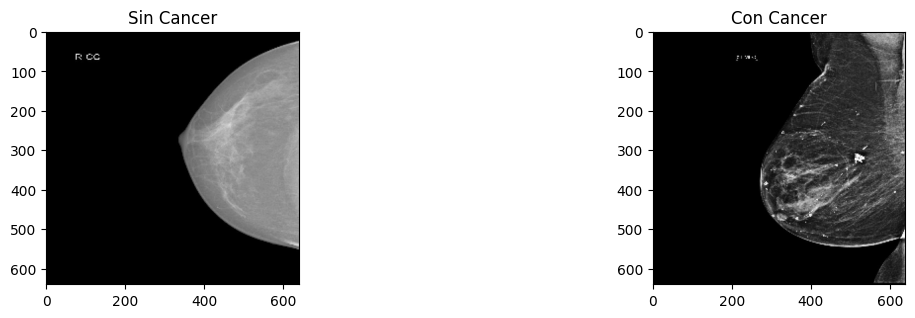

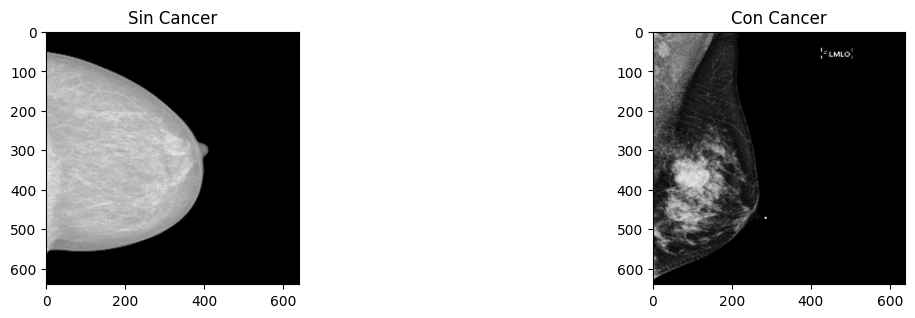

In [ ]:
import cv2

plt.figure(1, figsize = (15 , 5))
plt.subplot(1, 4 , 1)
plt.imshow(cv2.imread('/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/train/0/106_1160585918_png.rf.ddf71d5395cefb701d0b9ec2b0d81176.jpg'))
plt.title('Sin Cancer')

plt.figure(2, figsize = (15 , 5))
plt.subplot(1, 4 , 2)
plt.imshow(cv2.imread('/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/train/0/115_2071926579_png.rf.06eb0b511d88e77df10e2f493e5c7f9b.jpg'))
plt.title('Sin Cancer')

plt.figure(1, figsize = (15 , 5))
plt.subplot(1, 4 , 3)
plt.imshow(cv2.imread('/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/train/1/10130_1672636630_png.rf.52c6d1c8c6c58c5c1c5fcaaf57feb81d.jpg'))
plt.title('Con Cancer')

plt.figure(2, figsize = (15 , 5))
plt.subplot(1, 4 , 4)
plt.imshow(cv2.imread('/root/.cache/kagglehub/datasets/hayder17/breast-cancer-detection/versions/1/train/1/11341_1096308702_png.rf.681f9e6721db441ad18692e94ce58f88.jpg'))
plt.title('Con Cancer')


# **CNN Model**

# **¿Qué es una CNN?**

Una Red Neuronal Convolucional (CNN) es un tipo de red neuronal diseñada para procesar datos con una estructura de cuadrícula, como imágenes. Las CNN son particularmente eficaces para tareas de visión por computadora, como clasificación de imágenes, detección de objetos y segmentación de imágenes.

**Estructura de una CNN**

Una CNN se compone de varias capas que trabajan juntas para extraer características de las imágenes y clasificarlas. A continuación se describen las capas más comunes:

**Capa de Entrada:**

Esta capa recibe la imagen de entrada. Por lo general, las imágenes se representan como tensores de tres dimensiones: altura, ancho y canales de color (por ejemplo, RGB).

**Capas Convolucionales:**

**- Operación de Convolución:** En esta capa, se aplican filtros (o kernels) que recorren la imagen y realizan la convolución. Cada filtro extrae características específicas, como bordes, texturas o patrones.

**- Stride:** Es el paso que da el filtro al moverse sobre la imagen. Un stride mayor reduce el tamaño de la salida.

**- Padding:** Se añaden ceros alrededor de la imagen para controlar el tamaño de la salida después de la convolución. El padding "same" mantiene el tamaño de la entrada, mientras que "valid" lo reduce.

**Capa de Activación:**

Después de la convolución, se aplica una función de activación, como la ReLU (Rectified Linear Unit). Esta función introduce no linealidades en el modelo, permitiendo que la red aprenda funciones complejas.

**Capa de Agrupamiento (Pooling):**

Se utiliza para reducir la dimensionalidad y la complejidad computacional. La operación de pooling más común es el max pooling, que toma el valor máximo de una región específica del mapa de características.
El pooling ayuda a que la red sea más robusta a variaciones y a evitar el sobreajuste.

**Capas Completamente Conectadas (Fully Connected):**

Después de varias capas convolucionales y de pooling, las salidas se aplanan y se conectan a capas totalmente conectadas. Estas capas están diseñadas para clasificar las características extraídas.

La última capa suele usar una función de activación como Softmax para obtener probabilidades de clase en problemas de clasificación.

**Capa de Salida:**

Dependiendo de la tarea (por ejemplo, clasificación binaria o multiclase), la capa de salida puede tener uno o más nodos.

# **Proceso de Entrenamiento**

Forward Pass: La imagen de entrada se pasa a través de la red y se generan predicciones.

**Cálculo de Pérdida:** Se calcula la diferencia entre la predicción y la etiqueta real utilizando una función de pérdida (como la entropía cruzada para clasificación).

**Backward Pass (Backpropagation):** Se ajustan los pesos de la red utilizando algoritmos de optimización (como SGD o Adam) a través del algoritmo de retropropagación.

**Iteración:** Este proceso se repite durante múltiples épocas, ajustando los pesos para mejorar la precisión del modelo.

**Ventajas de las CNN**

**- Automatización de la Extracción de Características:** A diferencia de las redes neuronales tradicionales, las CNN pueden aprender automáticamente las características más relevantes de los datos sin necesidad de ingeniería manual.

**- Invariancia a la Traslación:** Gracias a la convolución y el pooling, las CNN son robustas a pequeñas variaciones en la posición de los objetos en las imágenes.

**- Reducción de Parámetros:** La convolución reduce la cantidad de parámetros necesarios en comparación con las redes completamente conectadas, lo que ayuda a prevenir el sobreajuste.

**Aplicaciones de las CNN**

**- Clasificación de Imágenes:** Identificar la categoría de una imagen (por ejemplo, perro, gato).

**- Detección de Objetos:** Localizar y clasificar múltiples objetos dentro de una imagen (por ejemplo, YOLO, SSD).

**- Segmentación de Imágenes:** Asignar una etiqueta a cada píxel en la imagen (por ejemplo, U-Net).

**- Reconocimiento Facial:** Identificar personas en imágenes o videos.

**- Análisis de Video:** Procesar frames de video para detectar acciones o eventos.

#**Resumen**

Las Redes Neuronales Convolucionales son fundamentales en el campo del Deep Learning y han revolucionado la forma en que abordamos problemas relacionados con imágenes. Su capacidad para aprender características complejas y su estructura eficiente las hacen ideales para tareas de visión por computadora. Con el avance de la tecnología y la disponibilidad de grandes volúmenes de datos, las CNN continúan evolucionando y mejorando en rendimiento.

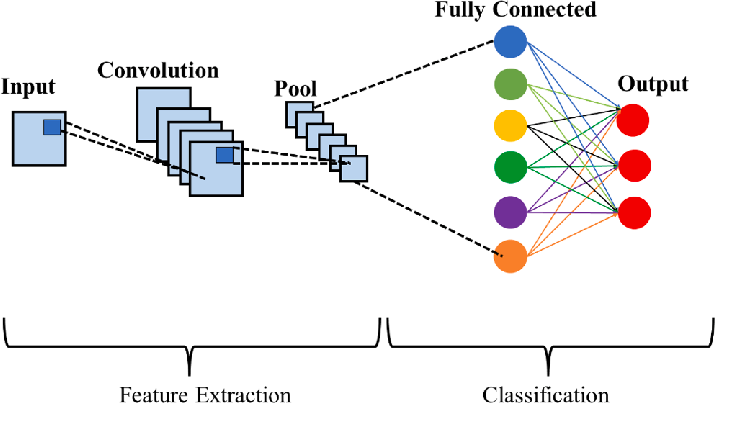

# Publicaciones relacionadas con CNN

- An anatomization on breast cancer detection and diagnosis employing multi-layer perceptron neural network (MLP) and Convolutional neural network (CNN)

https://www.sciencedirect.com/science/article/pii/S2588914120300125

- SD-CNN: A shallow-deep CNN for improved breast cancer diagnosis

https://www.sciencedirect.com/science/article/abs/pii/S0895611118302349


In [ ]:
#Model Build

model = Sequential()

# Input Layer
model.add(Conv2D(filters = 8, kernel_size= 3, padding='same',
                 activation = 'relu' ,input_shape =[640,640,3]))

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(filters = 16, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))


model.add(Conv2D(filters = 32, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size =(3,3)))

# Flatten Layer
model.add(Flatten())


# Fully Connected Layer
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# Output Layer

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 640, 640, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 320, 320, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 318, 318, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 106, 106, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 104, 104, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 34, 34, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,757,777 (18.15 MB)

 Trainable params: 4,757,777 (18.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data,
                          epochs = 100,
                          validation_data = val_data)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 49s 689ms/step - accuracy: 0.5821 - loss: 0.6766 - val_accuracy: 0.6637 - val_loss: 0.6361
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 438ms/step - accuracy: 0.6527 - loss: 0.6236 - val_accuracy: 0.6548 - val_loss: 0.6335
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 435ms/step - accuracy: 0.6889 - loss: 0.5793 - val_accuracy: 0.6385 - val_loss: 0.6429
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 440ms/step - accuracy: 0.7421 - loss: 0.5137 - val_accuracy: 0.6622 - val_loss: 0.6645
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 440ms/step - accuracy: 0.8215 - loss: 0.4217 - val_accuracy: 0.6341 - val_loss: 0.8205
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 441ms/step - accuracy: 0.8732 - loss: 0.2986 - val_accuracy: 0.5985 - val_loss: 1.2119
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 437ms/step - accuracy: 0.9093 - loss: 0.2077 - val_accuracy: 0.6356 - val_loss: 1.2288
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 439ms/step - accuracy: 0.9236 - loss: 0.1682 - 

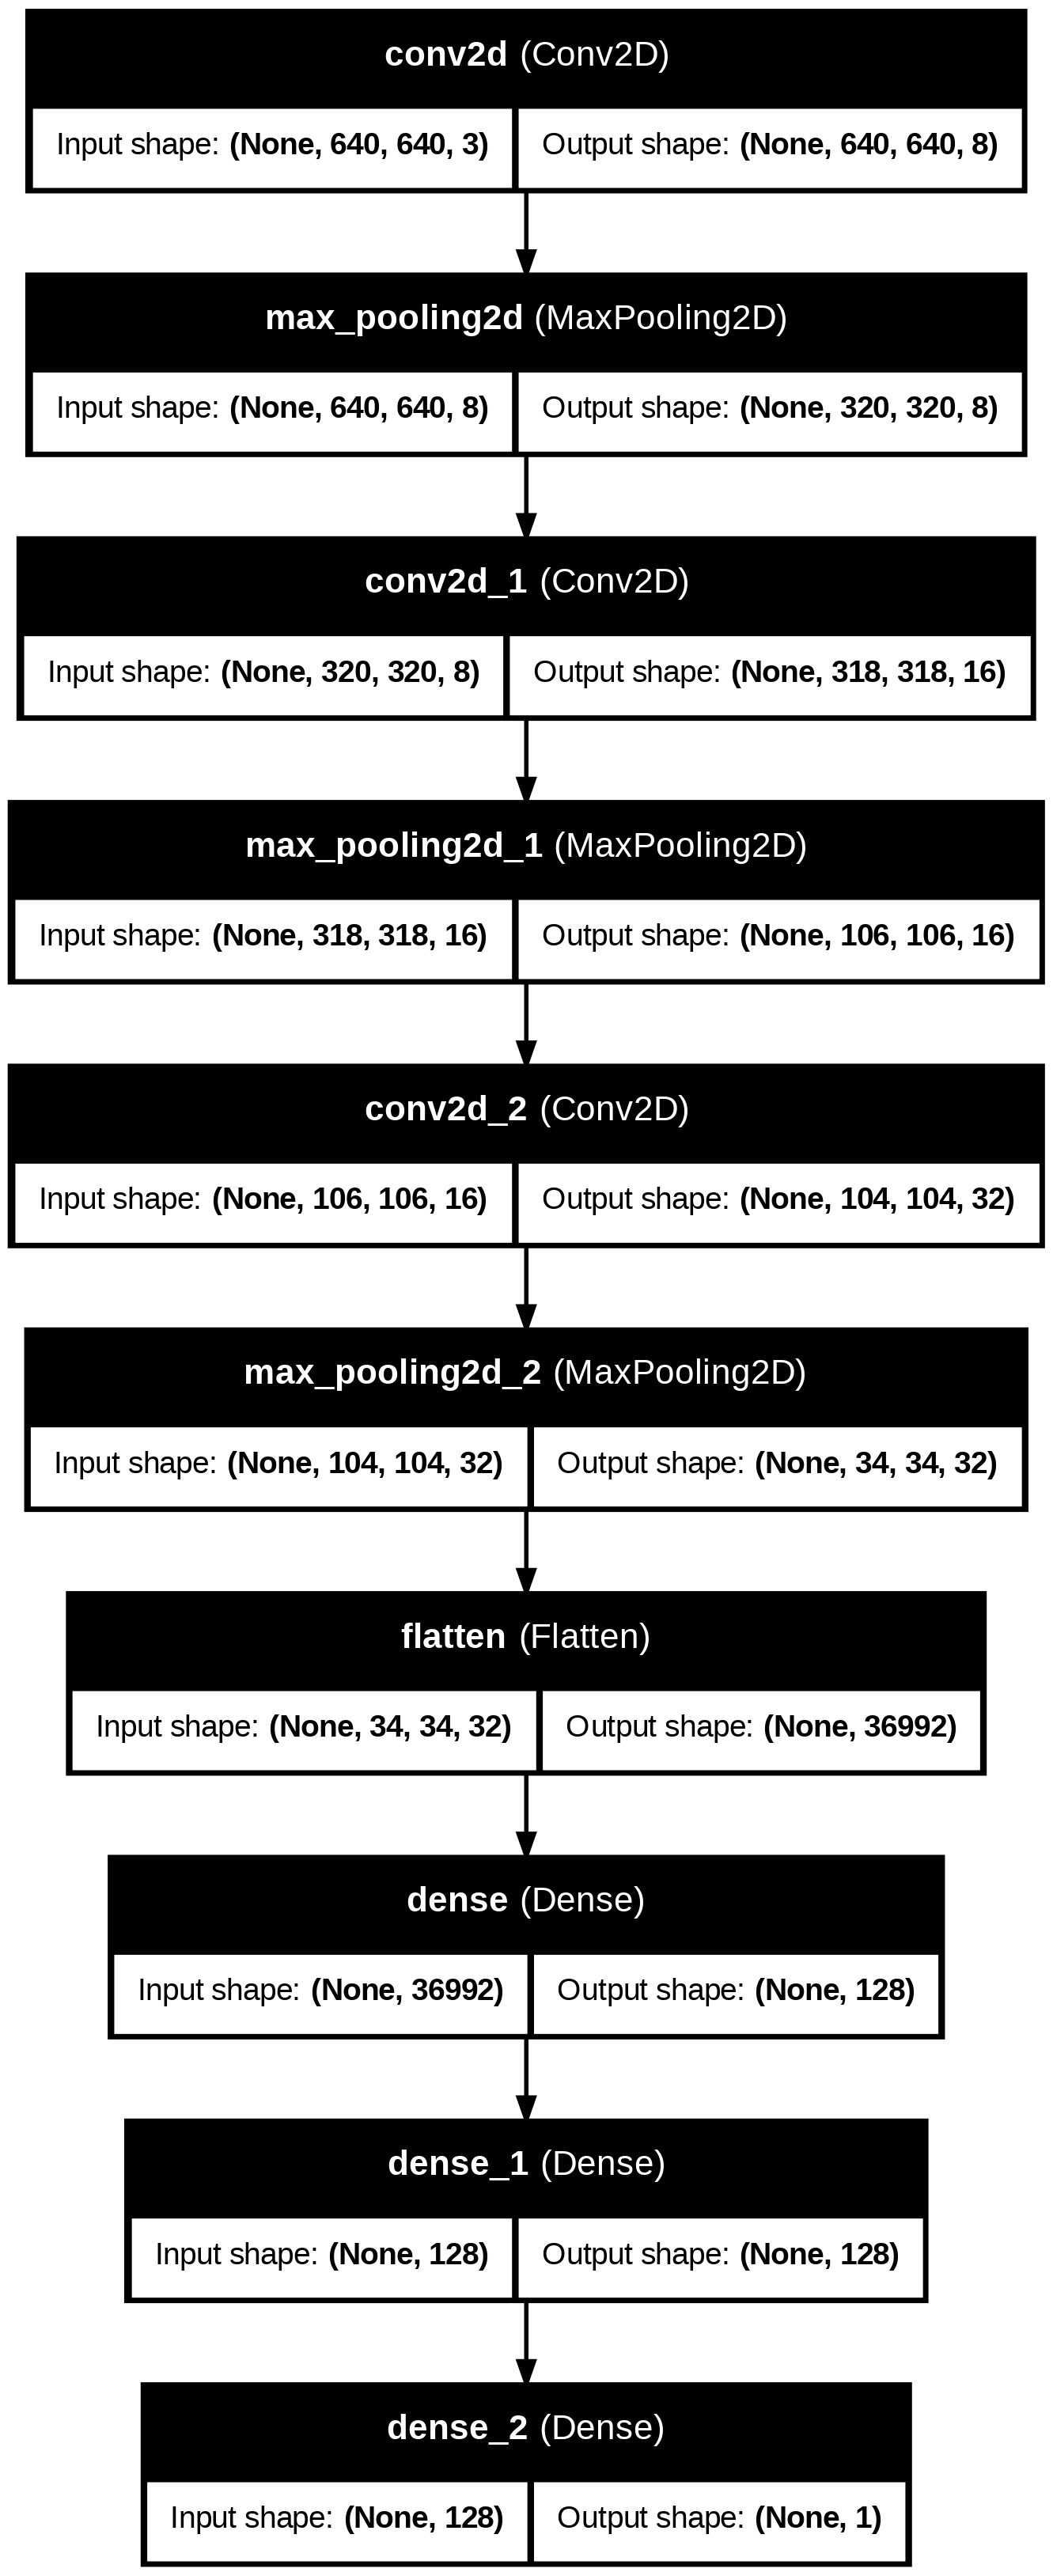

In [ ]:
# Plot the model architecture
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# CNN Results:

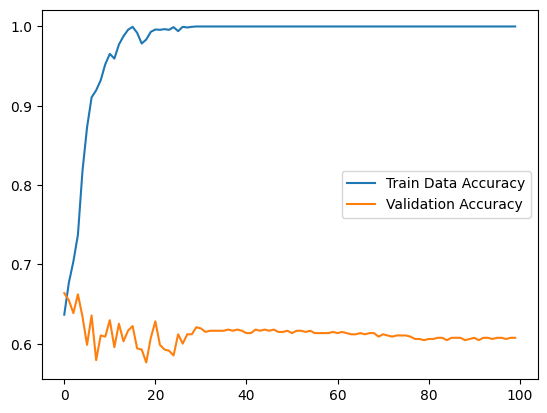

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

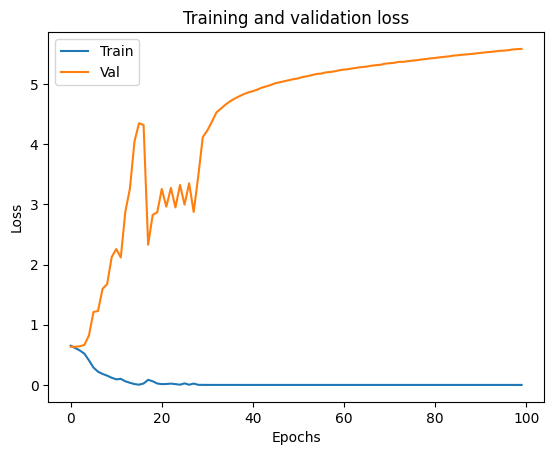

In [ ]:
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train data
train_loss, train_accuracy = model.evaluate(train_data)
print(f'Train accuracy: {train_accuracy}')
print(f'Train accuracy: {train_loss}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 21s 390ms/step - accuracy: 1.0000 - loss: 7.0655e-07
Train accuracy: 1.0
Train accuracy: 7.491145197491278e-07


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')
print(f'Test accuracy: {test_loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 872ms/step - accuracy: 0.6076 - loss: 5.8885
Test accuracy: 0.6190476417541504
Test accuracy: 5.9685540199279785


In [ ]:
# Evaluate the model on Validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {val_accuracy}')
print(f'Validation accuracy: {val_loss}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.5993 - loss: 5.5061
Validation accuracy: 0.6074073910713196
Validation accuracy: 5.583529949188232


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ** Solución con los hiperparametros**
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [ ]:
!pip install --quiet optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import cross_val_score
import optuna

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    # tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),  # Uncomment and set a valid path if needed
]

In [ ]:
def objective(trial):
    Caso1 = trial.suggest_int('Caso1', 8, 32)
    Caso2 = trial.suggest_int('Caso2', 8, 32)
    Caso3 = trial.suggest_int('Caso3', 8, 32)
    Caso4 = trial.suggest_int('Caso4', 128, 512)
    Caso5 = trial.suggest_int('Caso5', 128, 512)
    Caso6 = trial.suggest_int('Caso6', 20, 50)

#Model Build

    model = Sequential()

# Input Layer
    model.add(Conv2D(filters = Caso1, kernel_size= 3, padding='same',
                 activation = 'relu' ,input_shape =[640,640,3]))

# Pooling Layer
    model.add(MaxPooling2D(pool_size = (2,2)))


    model.add(Conv2D(filters = Caso2, kernel_size = 3 , activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3)))


    model.add(Conv2D(filters = Caso3, kernel_size = 3 , activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(3,3)))

# Flatten Layer
    model.add(Flatten())


# Fully Connected Layer
    model.add(Dense(Caso4, activation = 'relu'))
    model.add(Dense(Caso5, activation = 'relu'))

# Output Layer

    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Fit the model
    history = model.fit(train_data, validation_data = val_data,
                        epochs=Caso6,
                        callbacks=my_callbacks,
                        verbose=0)  # Set verbose to 0 to suppress output

    # Get the validation accuracy or loss
    val_accuracy = history.history['val_accuracy'][-1]  # Use last epoch's validation accuracy
    return val_accuracy  # Return this value to Optuna for optimization

In [ ]:
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=50)

[I 2024-11-28 12:50:43,620] A new study created in memory with name: no-name-286b93df-02f8-4ab9-89c3-9be2ac5fa068
[I 2024-11-28 12:53:44,377] Trial 0 finished with value: 0.5970370173454285 and parameters: {'Caso1': 17, 'Caso2': 31, 'Caso3': 26, 'Caso4': 358, 'Caso5': 188, 'Caso6': 24}. Best is trial 0 with value: 0.5970370173454285.
[I 2024-11-28 12:55:54,024] Trial 1 finished with value: 0.6399999856948853 and parameters: {'Caso1': 9, 'Caso2': 29, 'Caso3': 23, 'Caso4': 400, 'Caso5': 135, 'Caso6': 50}. Best is trial 0 with value: 0.5970370173454285.
[I 2024-11-28 12:58:58,501] Trial 2 finished with value: 0.6251851916313171 and parameters: {'Caso1': 28, 'Caso2': 13, 'Caso3': 12, 'Caso4': 198, 'Caso5': 245, 'Caso6': 36}. Best is trial 0 with value: 0.5970370173454285.
[I 2024-11-28 13:01:06,427] Trial 3 finished with value: 0.6399999856948853 and parameters: {'Caso1': 18, 'Caso2': 15, 'Caso3': 23, 'Caso4': 181, 'Caso5': 240, 'Caso6': 31}. Best is trial 0 with value: 0.5970370173454285.

In [ ]:
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Score: {best_score:.3f}")

Best Hyperparameters: {'Caso1': 16, 'Caso2': 10, 'Caso3': 31, 'Caso4': 465, 'Caso5': 227, 'Caso6': 40}
Best Score: 0.588


In [ ]:
#Model Build

model = Sequential()

# Input Layer
model.add(Conv2D(filters = 16, kernel_size= 3, padding='same',
                 activation = 'relu' ,input_shape =[640,640,3]))

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(filters = 10, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))


model.add(Conv2D(filters = 31, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size =(3,3)))

# Flatten Layer
model.add(Flatten())


# Fully Connected Layer
model.add(Dense(465, activation = 'relu'))
model.add(Dense(227, activation = 'relu'))

# Output Layer

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_153 (Conv2D)                  │ (None, 640, 640, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_153 (MaxPooling2D)     │ (None, 320, 320, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_154 (Conv2D)                  │ (None, 318, 318, 10)        │           1,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_154 (MaxPooling2D)     │ (None, 106, 106, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_155 (Conv2D)                  │ (None, 104, 104, 31)        │           2,821 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_155 (MaxPooling2D)     │ (None, 34, 34, 31)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_51 (Flatten)                 │ (None, 35836)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_153 (Dense)                    │ (None, 465)                 │      16,664,205 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_154 (Dense)                    │ (None, 227)                 │         105,782 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_155 (Dense)                    │ (None, 1)                   │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,774,934 (63.99 MB)

 Trainable params: 16,774,934 (63.99 MB)

 Non-trainable params: 0 (0.00 B)

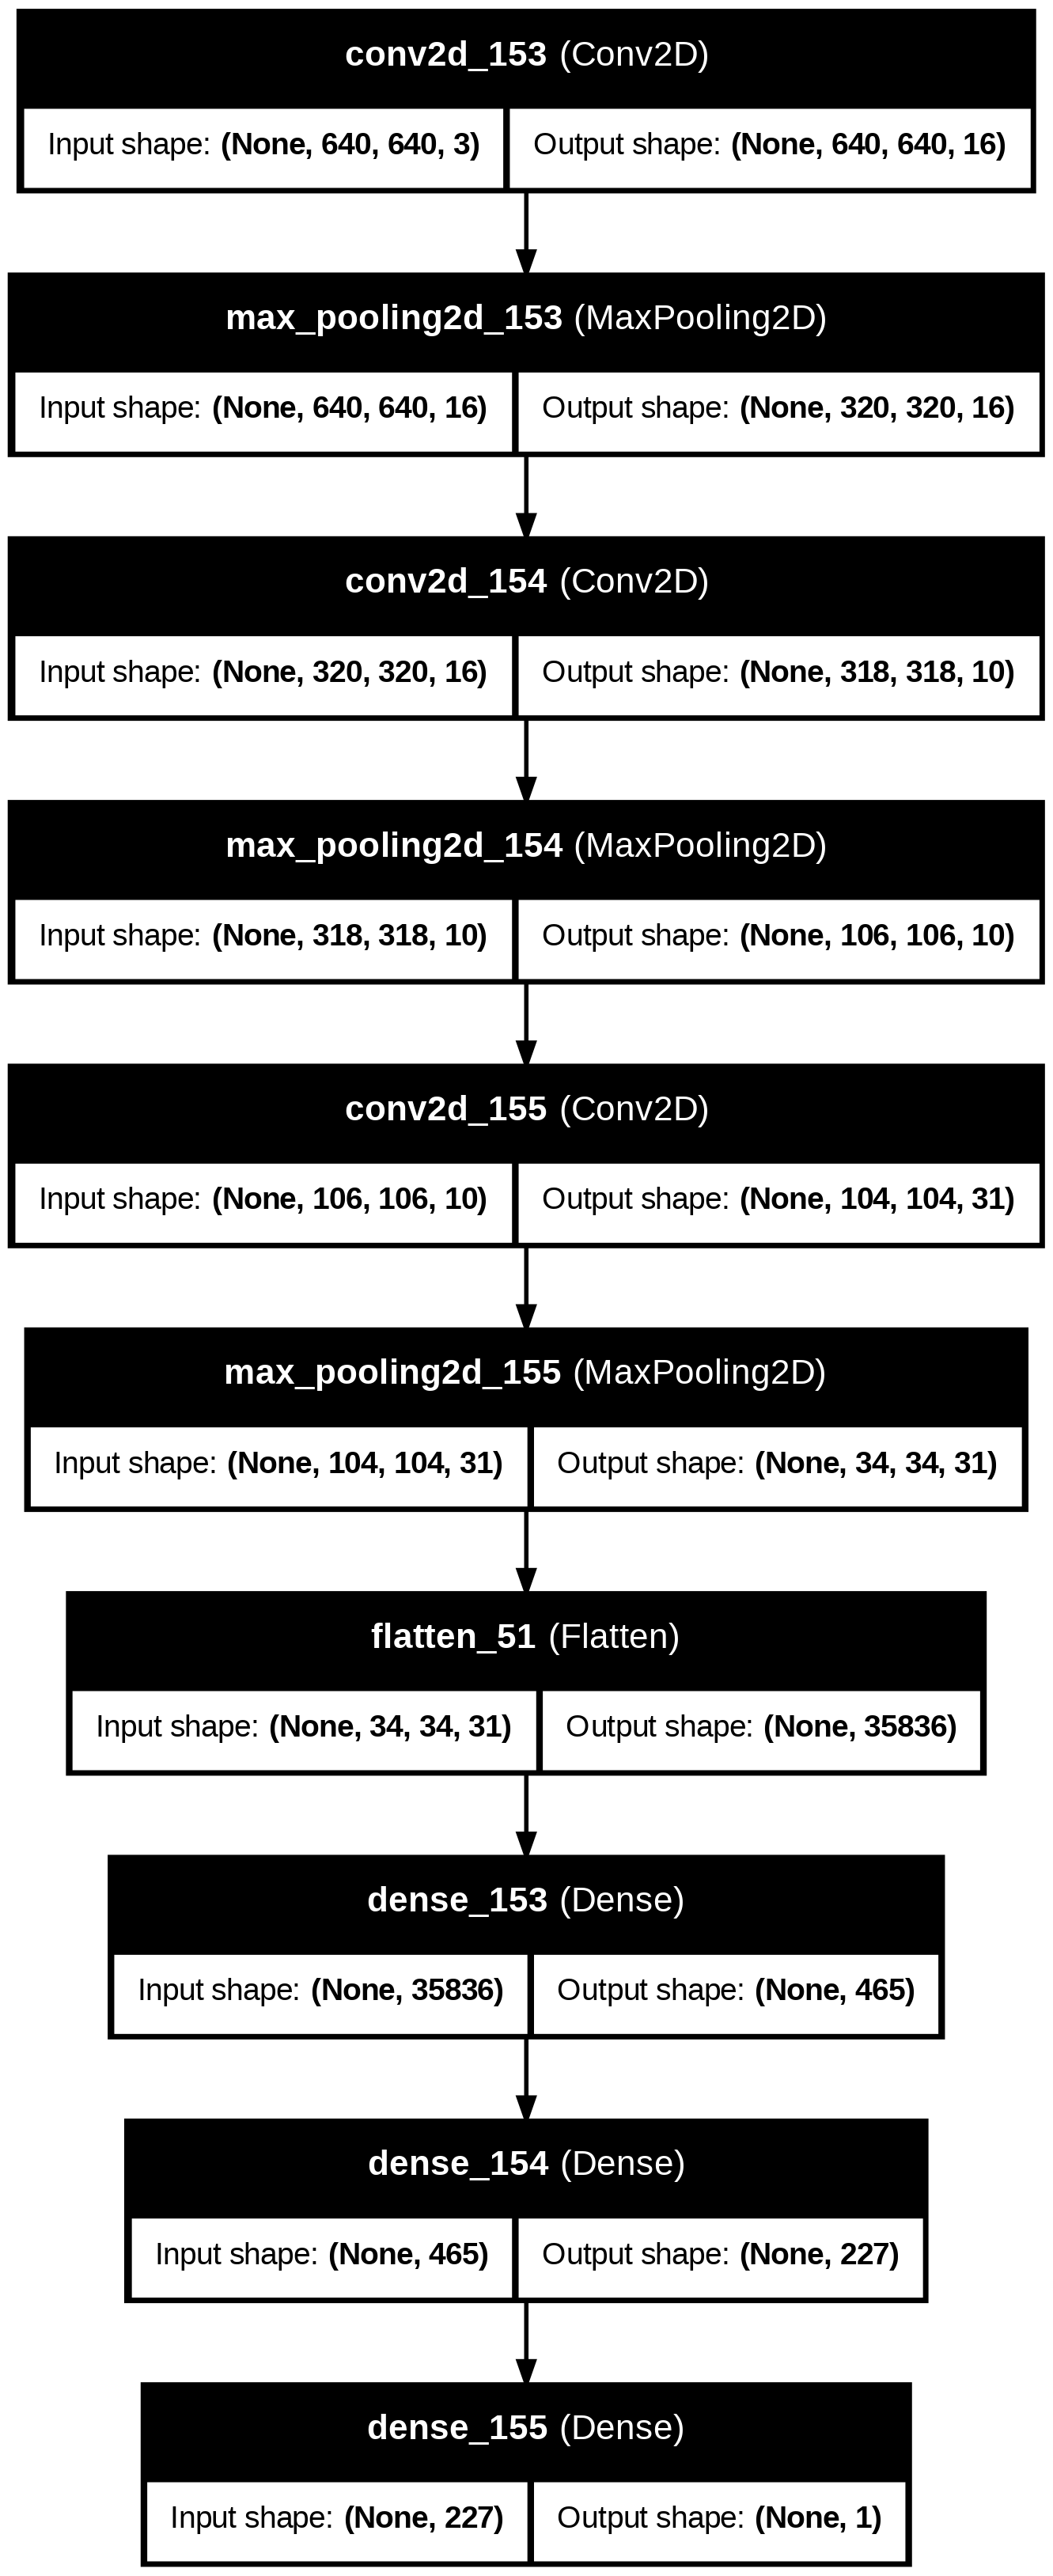

In [ ]:
# Plot the model architecture
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data,
                          epochs = 40,
                          validation_data = val_data)

Epoch 1/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 548ms/step - accuracy: 0.6625 - loss: 0.6637 - val_accuracy: 0.6637 - val_loss: 0.6542
Epoch 2/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 449ms/step - accuracy: 0.6789 - loss: 0.6090 - val_accuracy: 0.6681 - val_loss: 0.6441
Epoch 3/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 444ms/step - accuracy: 0.7025 - loss: 0.5734 - val_accuracy: 0.6652 - val_loss: 0.6304
Epoch 4/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.7243 - loss: 0.5289 - val_accuracy: 0.6489 - val_loss: 0.7075
Epoch 5/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 454ms/step - accuracy: 0.8228 - loss: 0.3713 - val_accuracy: 0.6489 - val_loss: 0.8133
Epoch 6/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 442ms/step - accuracy: 0.8709 - loss: 0.2799 - val_accuracy: 0.6281 - val_loss: 1.4065
Epoch 7/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 448ms/step - accuracy: 0.9077 - loss: 0.1874 - val_accuracy: 0.6163 - val_loss: 1.5088
Epoch 8/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 456ms/step - accuracy: 0.9372 - loss: 0.1481 - val_accu

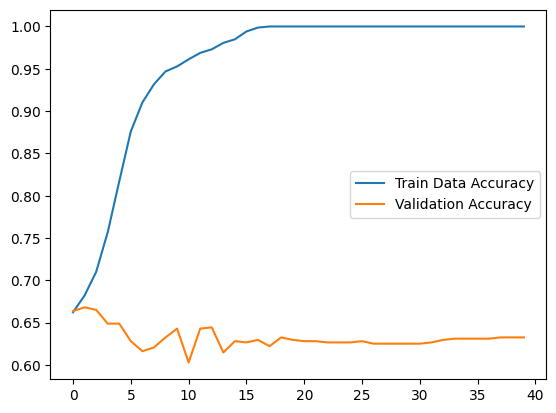

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

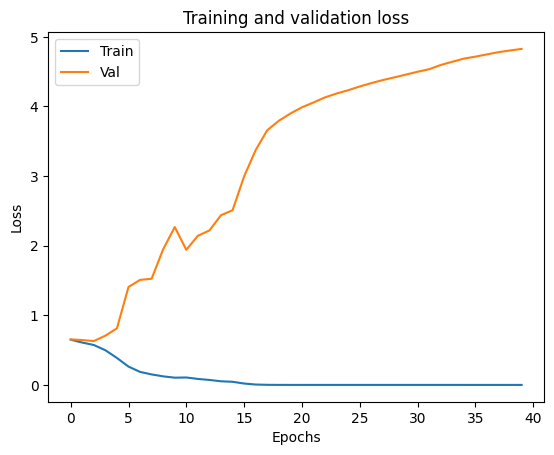

In [ ]:
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train data
train_loss, train_accuracy = model.evaluate(train_data)
print(f'Train accuracy: {train_accuracy}')
print(f'Train Lost: {train_loss}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 410ms/step - accuracy: 1.0000 - loss: 1.2159e-05
Train accuracy: 1.0
Train Lost: 1.1514200195961166e-05


In [ ]:
# Evaluate the model on Validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {val_accuracy}')
print(f'Validation Lost: {val_loss}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.6225 - loss: 5.1997
Validation accuracy: 0.6325926184654236
Validation Lost: 4.825851917266846


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')
print(f'Test Lost: {test_loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5709 - loss: 5.2751
Test accuracy: 0.5803571343421936
Test Lost: 4.795596122741699


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 464ms/step


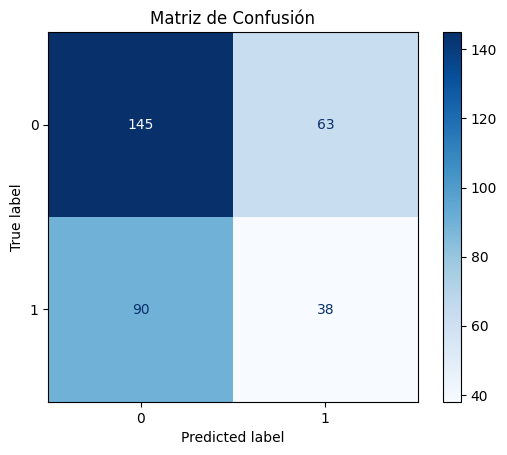

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre los datos de prueba
y_pred_probs = model.predict(test_data)  # Probabilidades
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir a clases binarias (0 o 1)

# Obtener las etiquetas verdaderas de los datos de prueba
y_true = test_data.classes  # Clases reales del conjunto de prueba

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


# **keras regularizers**

Los regularizadores en Keras son herramientas utilizadas para prevenir el sobreajuste (overfitting) en modelos de aprendizaje profundo. El sobreajuste ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, capturando ruido y patrones específicos que no generalizan a datos nuevos. Los regularizadores ayudan a controlar la complejidad del modelo y a mejorar su capacidad de generalización.

**Tipos de Regularizadores en Keras**

**Regularización L1:**

La regularización L1 añade una penalización a la función de pérdida que es proporcional a la suma de los valores absolutos de los pesos. Esto puede llevar a que algunos pesos se vuelvan exactamente cero, lo que resulta en un modelo más esparcido y fácil de interpretar.

Fórmula:

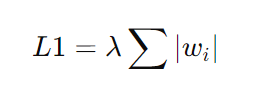

En Keras, se puede aplicar usando keras.regularizers.l1(l=0.01).

**Regularización L2:**

La regularización L2 añade una penalización proporcional al cuadrado de los pesos. Esto tiende a reducir el valor de todos los pesos, evitando que crezcan demasiado. A diferencia de L1, no lleva a que los pesos se conviertan exactamente en cero, por lo que generalmente no resulta en un modelo esparcido.
Fórmula:

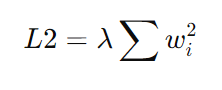


En Keras, se puede aplicar usando keras.regularizers.l2(l=0.01).

**Regularización L1_L2:**

Combina ambas penalizaciones L1 y L2. Esto permite obtener las ventajas de ambas: la esparsidad de L1 y la estabilidad de L2.

En Keras, se utiliza como keras.regularizers.l1_l2(l1=0.01, l2=0.01).

**Efectos de la Regularización**

**-Controlar la complejidad:** Al agregar una penalización a los pesos, los modelos tienden a ser menos complejos y más generalizables.

**-Prevención del sobreajuste:** Al limitar los pesos, el modelo se vuelve menos sensible a los datos de entrenamiento, lo que ayuda a mejorar su rendimiento en datos no vistos.

**Hiperparámetros**

Valor de λ (lambda): Este es el coeficiente de regularización que controla la cantidad de penalización. Un valor demasiado alto puede llevar a un modelo que no aprende lo suficiente (underfitting), mientras que un valor demasiado bajo puede no ser efectivo en la prevención del sobreajuste. Es común experimentar con diferentes valores y utilizar técnicas como la validación cruzada para encontrar el mejor.

**Otros Métodos de Regularización**

Además de los regularizadores de peso, hay otras técnicas de regularización que se pueden usar:

**Dropout:** Desactiva aleatoriamente una fracción de las neuronas durante el entrenamiento para evitar que el modelo dependa demasiado de un subconjunto de neuronas.

**Early Stopping:** Monitorea el rendimiento del modelo en un conjunto de validación y detiene el entrenamiento cuando el rendimiento deja de mejorar.

**Data Augmentation:** Aumenta el tamaño del conjunto de datos de entrenamiento aplicando transformaciones (rotaciones, traslaciones, etc.) a las imágenes.

**Conclusión**

Los regularizadores en Keras son herramientas poderosas para mejorar la capacidad de generalización de los modelos de aprendizaje profundo. Al aplicar L1, L2 o combinaciones de ambos, puedes ayudar a prevenir el sobreajuste y obtener modelos más robustos. Experimentar con diferentes técnicas y valores de regularización es clave para lograr un buen rendimiento en tareas específicas.

# Libros y publicaciones

- Keras and TensorFlow: A Hands-On Experience

https://link.springer.com/chapter/10.1007/978-3-030-66519-7_4

- Evidence-Based Regularization for Neural Networks

https://www.mdpi.com/2504-4990/4/4/51


In [ ]:
from tensorflow.keras.regularizers import l1

model = Sequential()


model.add(Conv2D(filters = 8, kernel_size= 3, padding='same',
                 kernel_regularizer = l1, activation = 'relu' ,input_shape =[640,640,3]))

model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(filters = 16, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))


model.add(Conv2D(filters = 32, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size =(3,3)))


model.add(Flatten())



model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

# Output Layer

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_156 (Conv2D)                  │ (None, 640, 640, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_156 (MaxPooling2D)     │ (None, 320, 320, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_157 (Conv2D)                  │ (None, 318, 318, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_157 (MaxPooling2D)     │ (None, 106, 106, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_158 (Conv2D)                  │ (None, 104, 104, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_158 (MaxPooling2D)     │ (None, 34, 34, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_52 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_156 (Dense)                    │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_157 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_158 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,757,777 (18.15 MB)

 Trainable params: 4,757,777 (18.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data,
                          epochs = 50,
                          validation_data = val_data)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 542ms/step - accuracy: 0.6177 - loss: 0.9270 - val_accuracy: 0.6637 - val_loss: 0.8491
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 443ms/step - accuracy: 0.6636 - loss: 0.8210 - val_accuracy: 0.6593 - val_loss: 0.7865
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 451ms/step - accuracy: 0.6903 - loss: 0.7409 - val_accuracy: 0.6489 - val_loss: 0.7462
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 446ms/step - accuracy: 0.7335 - loss: 0.6642 - val_accuracy: 0.6622 - val_loss: 0.7855
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 452ms/step - accuracy: 0.7528 - loss: 0.6157 - val_accuracy: 0.6356 - val_loss: 0.7666
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 443ms/step - accuracy: 0.8124 - loss: 0.4992 - val_accuracy: 0.6444 - val_loss: 0.8992
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 448ms/step - accuracy: 0.8676 - loss: 0.3790 - val_accuracy: 0.6296 - val_loss: 1.3194
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 447ms/step - accuracy: 0.8971 - loss: 0.3079 - val_accu

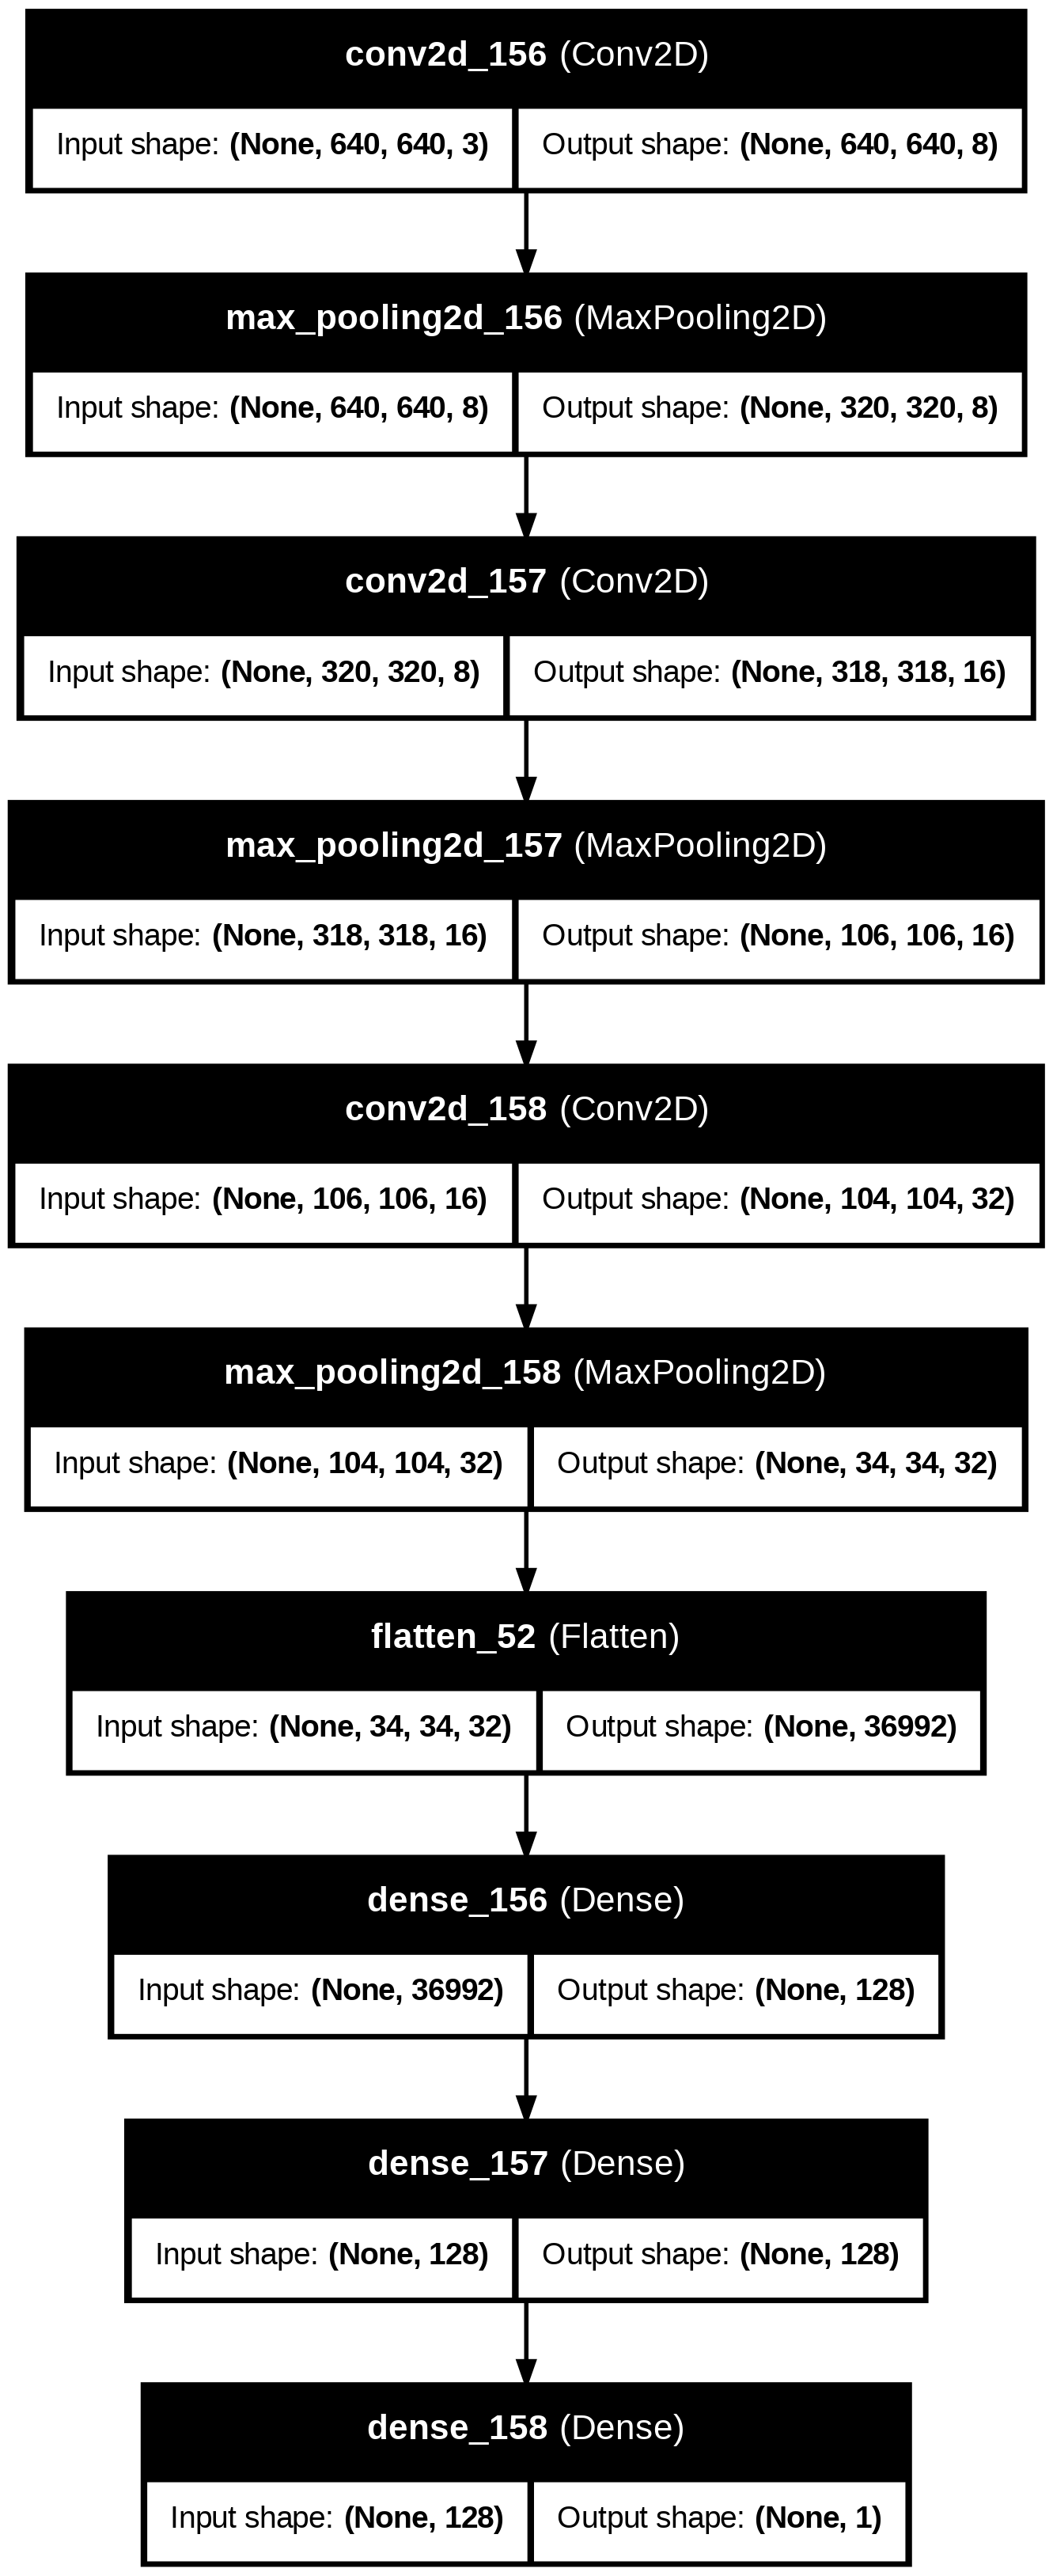

In [ ]:
# Plot the model architecture
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **Results: Regularization**

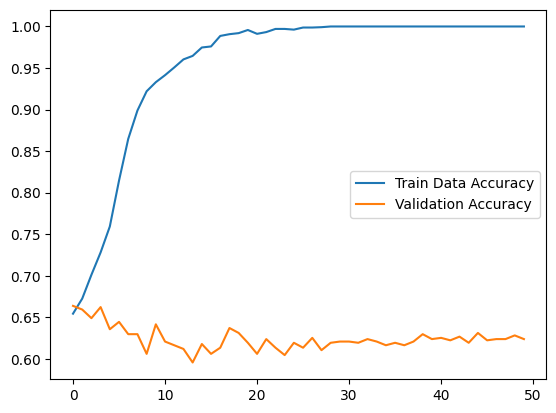

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

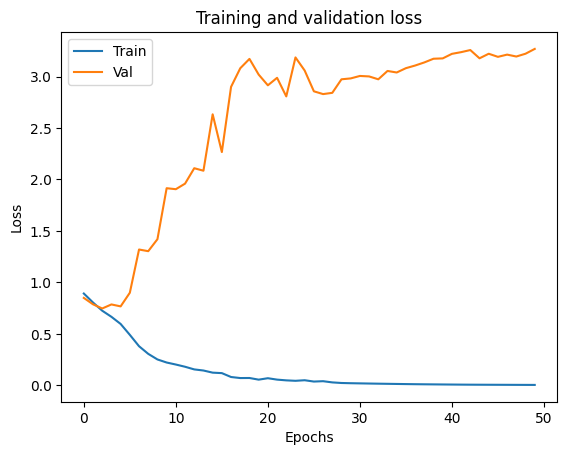

In [ ]:
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train
train_loss, train_accuracy = model.evaluate(train_data)
print(f'Train accuracy: {train_accuracy}')
print(f'Train loss: {train_loss}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - accuracy: 1.0000 - loss: 0.0030
Train accuracy: 1.0
Train loss: 0.0029727304354310036


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 437ms/step - accuracy: 0.5870 - loss: 3.6671
Test accuracy: 0.6101190447807312
Test loss: 3.231064558029175


In [ ]:
# Evaluate the model on Validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {val_accuracy}')
print(f'Validation loss: {val_loss}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.6037 - loss: 3.1371
Validation accuracy: 0.6237037181854248
Validation loss: 3.2692975997924805


////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ** Solución con los hiperparametros**
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    # tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),  # Uncomment and set a valid path if needed
]

In [ ]:
from tensorflow.keras.regularizers import l1

def objective(trial):
    Caso1 = trial.suggest_int('Caso1', 8, 32)
    Caso2 = trial.suggest_int('Caso2', 8, 32)
    Caso3 = trial.suggest_int('Caso3', 8, 32)
    Caso4 = trial.suggest_int('Caso4', 128, 512)
    Caso5 = trial.suggest_int('Caso5', 128, 512)
    Caso6 = trial.suggest_int('Caso6', 20, 50)

#Model Build

    model = Sequential()

    model = Sequential()

    model.add(Conv2D(filters = Caso1, kernel_size= 3, padding='same',
                 kernel_regularizer = l1, activation = 'relu' ,input_shape =[640,640,3]))

    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Conv2D(filters = Caso2, kernel_size = 3 , activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (3,3)))

    model.add(Conv2D(filters = Caso3, kernel_size = 3 , activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(3,3)))

    model.add(Flatten())


    model.add(Dense(Caso4, activation = 'relu'))
    model.add(Dense(Caso5, activation = 'relu'))

# Output Layer

    model.add(Dense(1, activation = 'sigmoid'))


    model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Fit the model
    history = model.fit(train_data, validation_data = val_data,
                        epochs=Caso6,
                        callbacks=my_callbacks,
                        verbose=0)  # Set verbose to 0 to suppress output

    # Get the validation accuracy or loss
    val_accuracy = history.history['val_accuracy'][-1]  # Use last epoch's validation accuracy
    return val_accuracy  # Return this value to Optuna for optimization


In [ ]:
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=50)

[I 2024-11-28 17:48:28,557] A new study created in memory with name: no-name-fa9cd8ac-a4d0-4a0b-9646-7d4159e799be
[I 2024-11-28 17:52:02,724] Trial 0 finished with value: 0.6251851916313171 and parameters: {'Caso1': 17, 'Caso2': 31, 'Caso3': 26, 'Caso4': 358, 'Caso5': 188, 'Caso6': 24}. Best is trial 0 with value: 0.6251851916313171.
[I 2024-11-28 17:55:52,740] Trial 1 finished with value: 0.6237037181854248 and parameters: {'Caso1': 9, 'Caso2': 29, 'Caso3': 23, 'Caso4': 400, 'Caso5': 135, 'Caso6': 50}. Best is trial 1 with value: 0.6237037181854248.
[I 2024-11-28 17:59:50,532] Trial 2 finished with value: 0.6029629707336426 and parameters: {'Caso1': 28, 'Caso2': 13, 'Caso3': 12, 'Caso4': 198, 'Caso5': 245, 'Caso6': 36}. Best is trial 2 with value: 0.6029629707336426.
[I 2024-11-28 18:02:01,315] Trial 3 finished with value: 0.6592592597007751 and parameters: {'Caso1': 18, 'Caso2': 15, 'Caso3': 23, 'Caso4': 181, 'Caso5': 240, 'Caso6': 31}. Best is trial 2 with value: 0.6029629707336426.

In [ ]:
best_params = study.best_params
best_score = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Score: {best_score:.3f}")

Best Hyperparameters: {'Caso1': 28, 'Caso2': 13, 'Caso3': 12, 'Caso4': 198, 'Caso5': 245, 'Caso6': 36}
Best Score: 0.603


In [ ]:
from tensorflow.keras.regularizers import l1

model = Sequential()

model.add(Conv2D(filters = 28, kernel_size= 3, padding='same',
                 kernel_regularizer = l1, activation = 'relu' ,input_shape =[640,640,3]))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 13, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))

model.add(Conv2D(filters = 12, kernel_size = 3 , activation = 'relu'))
model.add(MaxPooling2D(pool_size =(3,3)))

model.add(Flatten())


model.add(Dense(198, activation = 'relu'))
model.add(Dense(245, activation = 'relu'))

# Output Layer

model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 640, 640, 28)        │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 320, 320, 28)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 318, 318, 13)        │           3,289 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 106, 106, 13)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 104, 104, 12)        │           1,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 34, 34, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 13872)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 198)                 │       2,746,854 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 245)                 │          48,755 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             246 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,801,344 (10.69 MB)

 Trainable params: 2,801,344 (10.69 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data,
                          epochs = 36,
                          validation_data = val_data)

Epoch 1/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 64s 842ms/step - accuracy: 0.6420 - loss: 1.1597 - val_accuracy: 0.6637 - val_loss: 0.9961
Epoch 2/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 460ms/step - accuracy: 0.6619 - loss: 0.9283 - val_accuracy: 0.6548 - val_loss: 0.8350
Epoch 3/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 453ms/step - accuracy: 0.6931 - loss: 0.7859 - val_accuracy: 0.6637 - val_loss: 0.7815
Epoch 4/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 456ms/step - accuracy: 0.6795 - loss: 0.7726 - val_accuracy: 0.6622 - val_loss: 0.7778
Epoch 5/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 458ms/step - accuracy: 0.7142 - loss: 0.6973 - val_accuracy: 0.6563 - val_loss: 0.7678
Epoch 6/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 455ms/step - accuracy: 0.7449 - loss: 0.6384 - val_accuracy: 0.6504 - val_loss: 0.7743
Epoch 7/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 452ms/step - accuracy: 0.8083 - loss: 0.5215 - val_accuracy: 0.6430 - val_loss: 0.8862
Epoch 8/36
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 453ms/step - accuracy: 0.8725 - loss: 0.3930 - val_accu

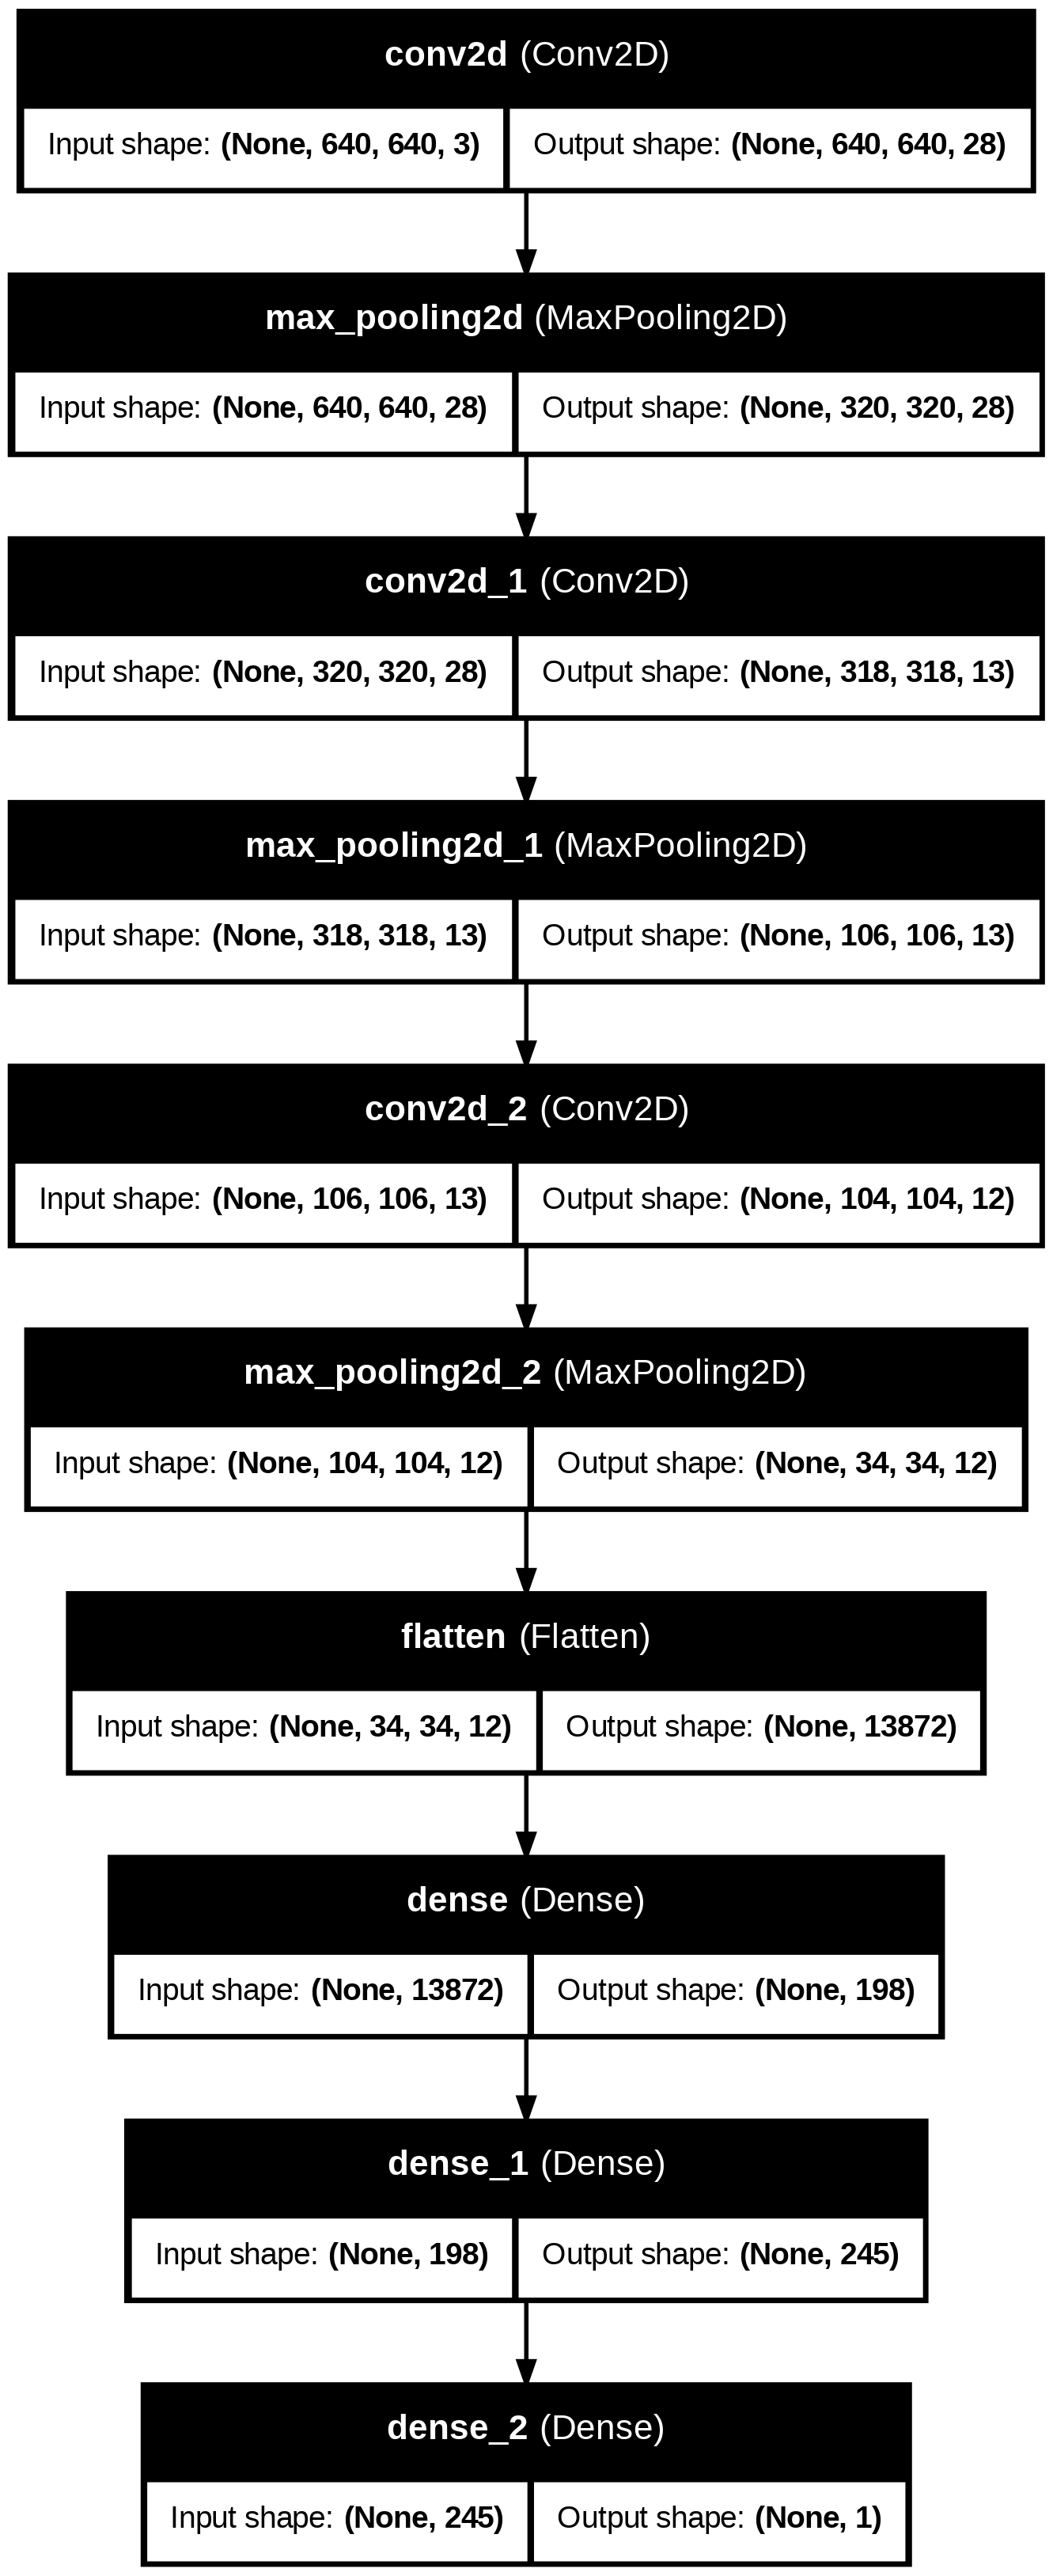

In [ ]:
# Plot the model architecture
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

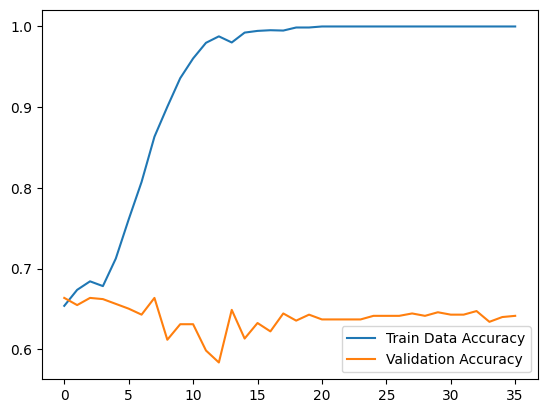

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

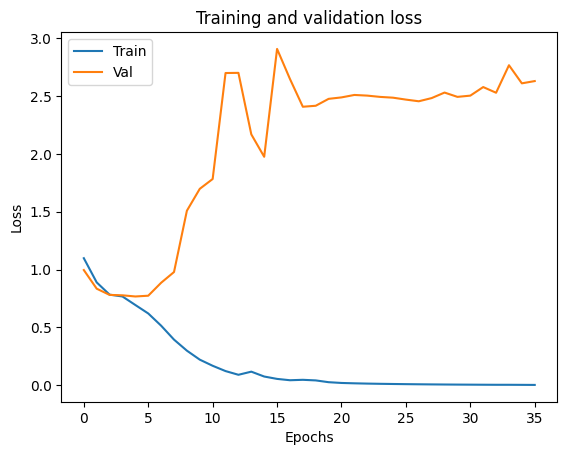

In [ ]:
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train
train_loss, train_accuracy = model.evaluate(train_data)
print(f'Train accuracy: {train_accuracy}')
print(f'Train loss: {train_loss}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 411ms/step - accuracy: 1.0000 - loss: 0.0033
Train accuracy: 1.0
Train loss: 0.003315603593364358


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5428 - loss: 2.8720
Test accuracy: 0.574404776096344
Test loss: 2.831947088241577


In [ ]:
# Evaluate the model on Validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {val_accuracy}')
print(f'Validation loss: {val_loss}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.6394 - loss: 2.7316
Validation accuracy: 0.6414814591407776
Validation loss: 2.6290929317474365


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step


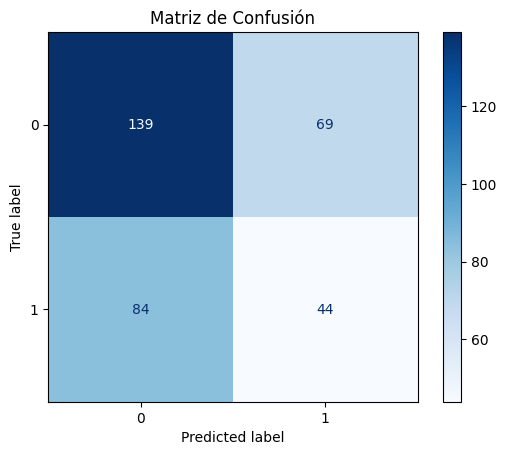

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre los datos de prueba
y_pred_probs = model.predict(test_data)  # Probabilidades
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir a clases binarias (0 o 1)

# Obtener las etiquetas verdaderas de los datos de prueba
y_true = test_data.classes  # Clases reales del conjunto de prueba

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

#**Transfer learning: VGG19**

VGG19 es un modelo de red neuronal convolucional que se destaca por su simplicidad y efectividad en tareas de visión por computadora. Fue desarrollado por el Visual Geometry Group (VGG) de la Universidad de Oxford y se presentó en la competición ImageNet Challenge en 2014. Aquí te doy una explicación detallada sobre VGG19, sus características, arquitectura y aplicaciones.

#**Características de VGG19**

**Profundidad:**

VGG19 tiene 19 capas de pesos, de ahí su nombre. Esto incluye 16 capas convolucionales y 3 capas completamente conectadas.

**Arquitectura Sencilla:**

La arquitectura de VGG19 es notable por su uso de pequeñas convoluciones (3x3) y max pooling, lo que permite mantener la complejidad de la red baja mientras se logra un alto rendimiento.

**Uso de ReLU:**

Utiliza la función de activación ReLU (Rectified Linear Unit) para introducir no linealidades en el modelo, lo que permite aprender patrones complejos.

**Normalización:**

Las imágenes de entrada se normalizan utilizando los valores medios de los canales RGB de las imágenes de entrenamiento para centrar los datos.

**Transfer Learning:**

VGG19 se ha utilizado ampliamente como base para transfer learning debido a su rendimiento en varias tareas de visión por computadora.
Arquitectura de VGG19

# **La arquitectura de VGG19 se puede desglosar de la siguiente manera:**

**Capas Convolucionales:**

La red comienza con una serie de capas convolucionales que aplican filtros de 3x3 en la entrada. Las capas convolucionales están organizadas en bloques, donde cada bloque tiene múltiples capas convolucionales seguidas de una capa de max pooling.

**Capas de Max Pooling:**

Después de cada bloque de convolución, se aplica una capa de max pooling (2x2) con un stride de 2. Esto reduce las dimensiones espaciales de las características extraídas y ayuda a capturar la información más relevante.

**Capas Completamente Conectadas:**

Al final de las capas convolucionales y de pooling, las características se aplanan y se conectan a dos capas densas de 4096 neuronas, seguidas de una tercera capa de salida que utiliza la función de activación softmax para clasificar las imágenes en múltiples categorías.

**Diagrama de VGG19**

Si quisieras visualizar VGG19, generalmente se representa con bloques que indican las capas convolucionales, las operaciones de pooling y las capas densas. Aquí hay un resumen de la estructura:

Input (224x224x3)
    ↓
Conv3-64
    ↓
Conv3-64
    ↓
MaxPooling (2x2)
    ↓
Conv3-128
    ↓
Conv3-128
    ↓
MaxPooling (2x2)
    ↓
Conv3-256
    ↓
Conv3-256
    ↓
Conv3-256
    ↓
MaxPooling (2x2)
    ↓
Conv3-512
    ↓
Conv3-512
    ↓
Conv3-512
    ↓
MaxPooling (2x2)
    ↓
Conv3-512
    ↓
Conv3-512
    ↓
Conv3-512
    ↓
MaxPooling (2x2)
    ↓
Flatten
    ↓
Dense (4096)
    ↓
Dense (4096)
    ↓
Dense (n_classes, Softmax)


#**Aplicaciones de VGG19**

**Clasificación de Imágenes:** VGG19 se ha utilizado con éxito en tareas de clasificación de imágenes, como la clasificación de objetos en el conjunto de datos ImageNet.

**Transfer Learning:** Debido a su arquitectura preentrenada, VGG19 se usa frecuentemente para transferir el aprendizaje a nuevos conjuntos de datos, permitiendo obtener buenos resultados incluso con pocos datos.

**Detección de Objetos:** Se ha adaptado para modelos de detección de objetos, como Faster R-CNN.

**Segmentación de Imágenes:** Puede ser utilizado como base para modelos de segmentación, como U-Net.

#**Ventajas y Desventajas**

**Ventajas:**

**Simplicidad:** La arquitectura es fácil de entender y de implementar.

**Rendimiento:** Ofrece un rendimiento sólido en tareas de clasificación de imágenes.

**Flexibilidad:** Se puede usar para transfer learning y adaptarse a diferentes tareas.

**Desventajas:**

**Requerimientos Computacionales:** Es un modelo bastante pesado en términos de memoria y potencia de cálculo.

**No es la Más Moderna:** Existen modelos más recientes (como ResNet, Inception) que superan su rendimiento y eficiencia.

**Conclusión**

VGG19 es un modelo icónico en el campo del aprendizaje profundo, conocido por su arquitectura efectiva y su rendimiento en competiciones de visión por computadora. Aunque ha sido superado por modelos más avanzados, sigue siendo una base sólida para el aprendizaje y la aplicación en diversas tareas de visión por computadora.

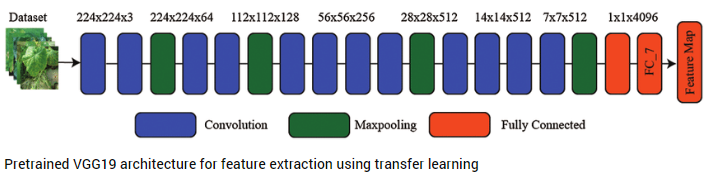

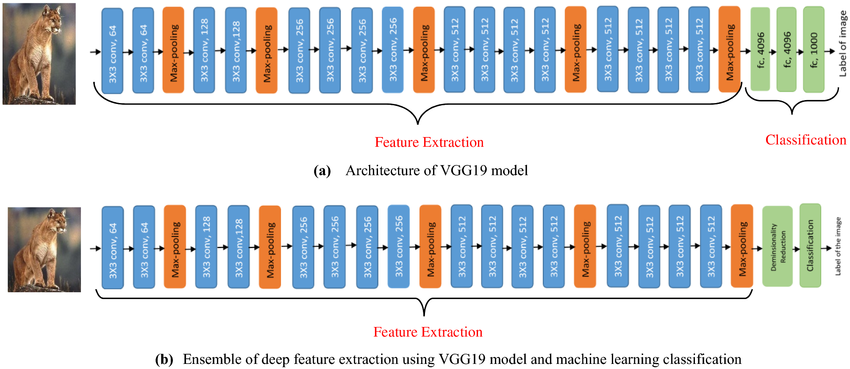

# Publicaciones

- Transfer learning for image classification using VGG19: Caltech-101 image data set

https://www.researchgate.net/publication/354660089_Transfer_learning_for_image_classification_using_VGG19_Caltech-101_image_data_set




In [ ]:
train_data = generator.flow_from_directory( directory= train_path,
                                            target_size = (240,240),
                                            class_mode= 'binary',
                                            shuffle = True)

val_data = generator.flow_from_directory( directory= validation_path,
                                            target_size = (240,240),
                                            class_mode= 'binary',
                                            shuffle = True)

test_data = generator.flow_from_directory( directory= test_path,
                                            target_size = (240,240),
                                            class_mode= 'binary')

Found 2372 images belonging to 2 classes.
Found 675 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Model

vgg19 = VGG19()
vgg19.summary()

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
base_model = VGG19(include_top=False, input_shape=(240, 240, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_history = model.fit(train_data,
                          epochs = 50,
                          validation_data = val_data)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 79s 608ms/step - accuracy: 0.6128 - loss: 3.5707 - val_accuracy: 0.6637 - val_loss: 0.6507
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 337ms/step - accuracy: 0.6515 - loss: 0.6865 - val_accuracy: 0.6637 - val_loss: 0.6560
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 336ms/step - accuracy: 0.6738 - loss: 0.6471 - val_accuracy: 0.6637 - val_loss: 0.6809
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 335ms/step - accuracy: 0.6730 - loss: 0.7013 - val_accuracy: 0.6637 - val_loss: 0.6461
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 335ms/step - accuracy: 0.6493 - loss: 0.6523 - val_accuracy: 0.6637 - val_loss: 0.6396
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 337ms/step - accuracy: 0.6640 - loss: 0.6407 - val_accuracy: 0.6637 - val_loss: 0.6385
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 336ms/step - accuracy: 0.6765 - loss: 0.6328 - val_accuracy: 0.6637 - val_loss: 0.6389
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 26s 335ms/step - accuracy: 0.6642 - loss: 0.6831 - val_accu

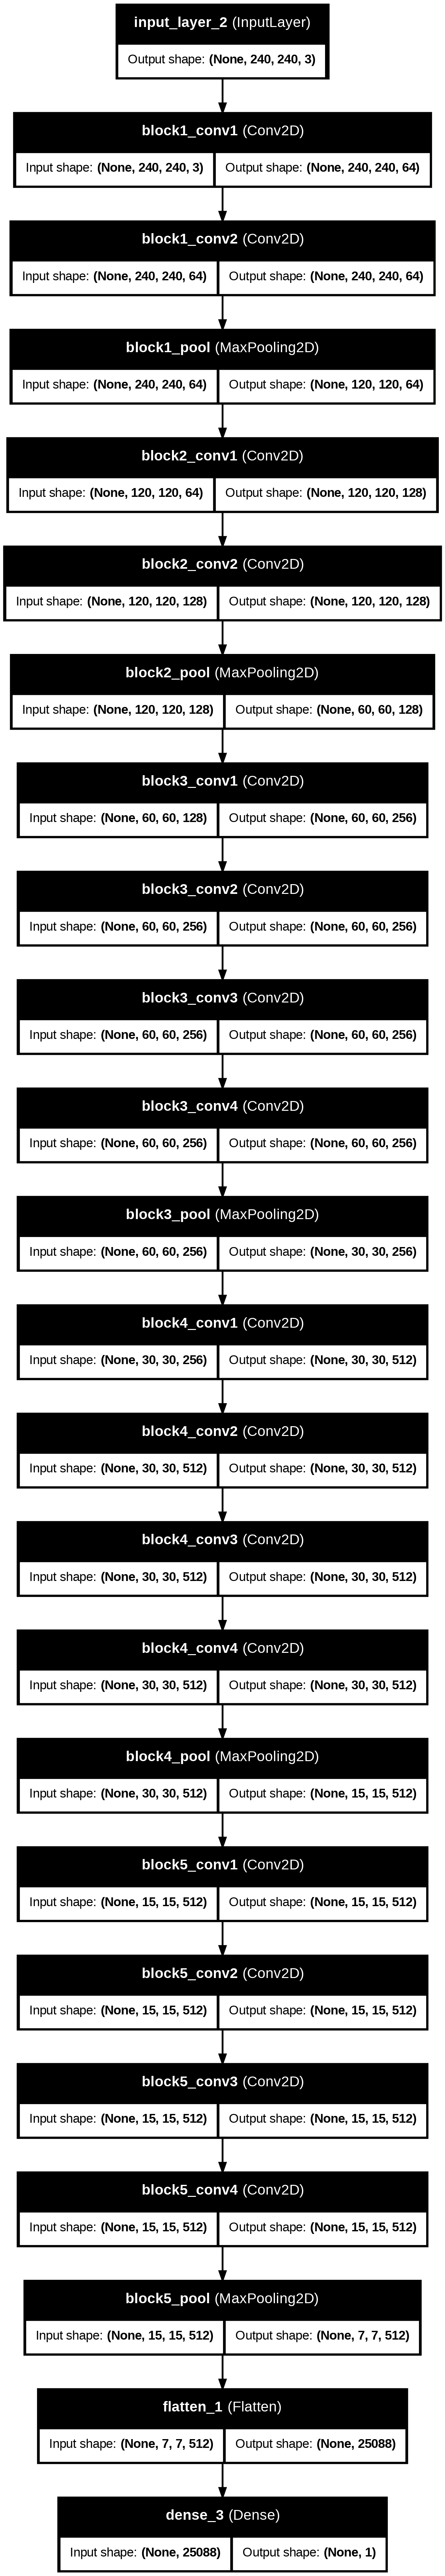

In [ ]:
# Plot the model architecture
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


# Results : Transfer Learning

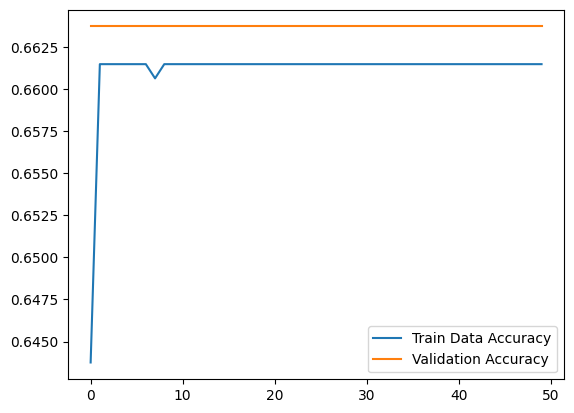

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

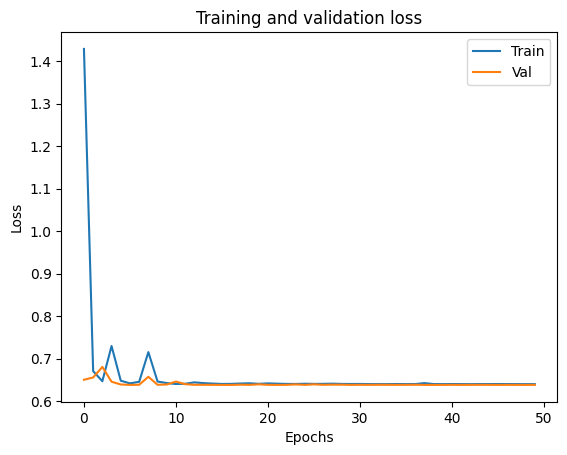

In [ ]:
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train
train_loss, train_accuracy = model.evaluate(train_data)
print(f'Train accuracy: {train_accuracy}')
print(f'Train loss: {train_loss}')

75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.6584 - loss: 0.6421
Train accuracy: 0.6614671349525452
Train loss: 0.6401339769363403


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 0.6297 - loss: 0.6606
Test accuracy: 0.6190476417541504
Test loss: 0.6674431562423706


In [ ]:
# Evaluate the model on Validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {val_accuracy}')
print(f'Validation loss: {val_loss}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6744 - loss: 0.6318
Validation accuracy: 0.6637036800384521
Validation loss: 0.6386938691139221


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


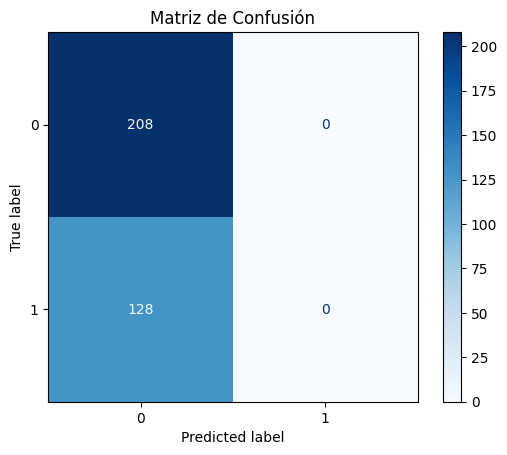

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre los datos de prueba
y_pred_probs = model.predict(test_data)  # Probabilidades
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir a clases binarias (0 o 1)

# Obtener las etiquetas verdaderas de los datos de prueba
y_true = test_data.classes  # Clases reales del conjunto de prueba

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# **Transfer Learning : RESNet50**

ResNet50 es una arquitectura de red neuronal profunda desarrollada por Kaiming He y su equipo en 2015, que ha sido ampliamente utilizada en tareas de visión por computadora. La clave de ResNet es el uso de "bloques residuales", que permiten la creación de redes mucho más profundas sin el problema del desvanecimiento del gradiente.

#**Detalles sobre ResNet50**

#**1. Arquitectura**

ResNet50 es una red neuronal que consta de 50 capas. Su arquitectura se basa en bloques residuales que permiten que la entrada de una capa se sume a la salida de la misma capa. Esto se realiza mediante conexiones de "salto" (skip connections), que facilitan el flujo del gradiente durante el entrenamiento.

#**2. Bloques Residuales**

Un bloque residual típico tiene la siguiente estructura:

**Entrada:** La entrada de la capa.

**Convoluciones:** Aplicación de convoluciones 2D, seguidas de activaciones ReLU.

**Suma:** La entrada original se suma a la salida de las convoluciones.

**Salida:** La suma se pasa a través de otra activación ReLU.
Esto permite que la red aprenda la función de identidad, lo que facilita el entrenamiento de redes más profundas.

#**3. Capas**

ResNet50 está formada por varios tipos de capas:

**Convolucionales:** Usadas para extraer características de las imágenes.

**Batch Normalization:** Normaliza las salidas de las capas anteriores para mejorar la estabilidad y velocidad del entrenamiento.

**ReLU:** Función de activación que introduce no linealidad en el modelo.

**Pooling:** Generalmente se utiliza max pooling para reducir la dimensionalidad de las características extraídas.

#**4. Ventajas**

**Profundidad:** ResNet permite construir redes mucho más profundas (por ejemplo, ResNet101, ResNet152) sin problemas significativos de entrenamiento.

**Mejor rendimiento:** Ha demostrado ser muy efectiva en tareas de clasificación de imágenes, logrando resultados sobresalientes en competiciones como ImageNet.

**Flexibilidad:** Puede ser adaptada a diferentes tareas, como detección de objetos y segmentación, simplemente cambiando la parte superior de la red.

#**Conclusión**
ResNet50 es una de las arquitecturas más influyentes en la visión por computadora y ha servido como base para muchas investigaciones y desarrollos posteriores. Su diseño innovador ha permitido el avance en la creación de modelos más profundos y precisos, haciendo que sea una elección popular para diversas aplicaciones.

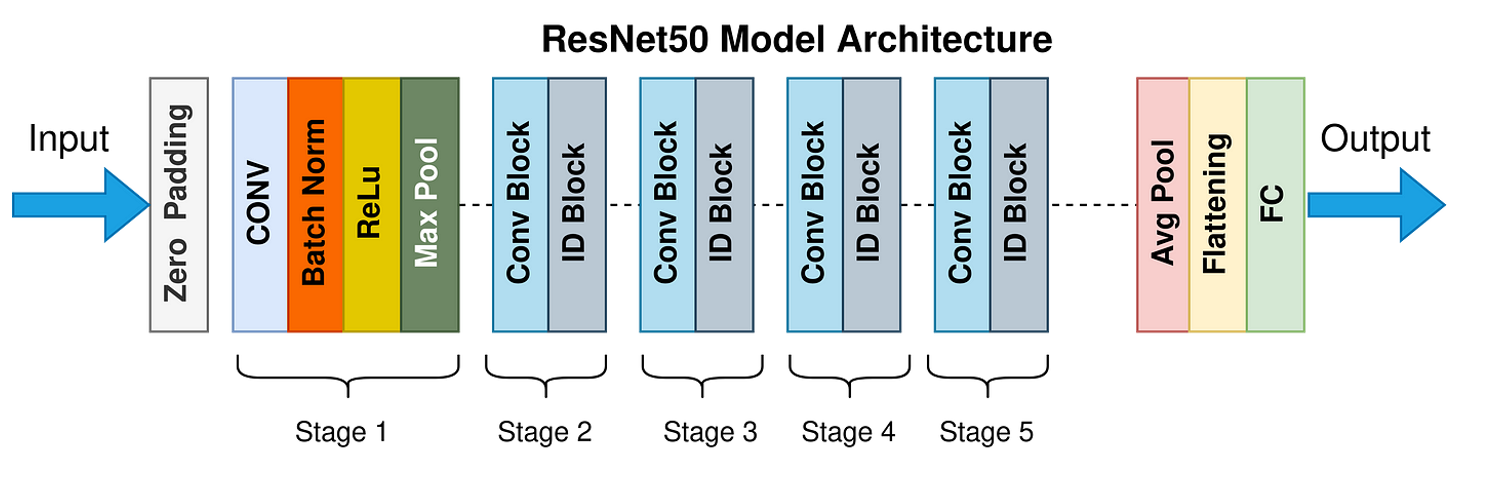

# Publicaciones

- Detecting Affect States Using VGG16, ResNet50 and SE-ResNet50 Networks

https://link.springer.com/article/10.1007/s42979-020-0114-9

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model

In [ ]:
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(240, 240, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
train_data = generator.flow_from_directory( directory= train_path,
                                            target_size = (240,240),
                                            class_mode= 'binary',
                                            shuffle = True)

val_data = generator.flow_from_directory( directory= validation_path,
                                            target_size = (240,240),
                                            class_mode= 'binary',
                                            shuffle = True)

test_data = generator.flow_from_directory( directory= test_path,
                                            target_size = (240,240),
                                            class_mode= 'binary')

Found 2372 images belonging to 2 classes.
Found 675 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [ ]:
x = resnet50_model.output
x = Flatten()(x)
output_layer = Dense(1, activation='sigmoid')(x)

# Create the complete model
model = Model(inputs=resnet50_model.input, outputs=output_layer)
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 240, 240, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 246, 246, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 120, 120, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 120, 120, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 120, 120, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 122, 122, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 60, 60, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 60, 60, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 60, 60, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 60, 60, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 60, 60, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 60, 60, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 60, 60, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 60, 60, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 60, 60, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,718,785 (90.48 MB)

 Trainable params: 23,665,665 (90.28 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
train_data.samples

2372

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model_history = model.fit( train_data,
                epochs = 50 ,
                validation_data = val_data)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 103s 601ms/step - accuracy: 0.5815 - loss: 3.6338 - val_accuracy: 0.6637 - val_loss: 0.6867
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.6322 - loss: 1.1893 - val_accuracy: 0.6637 - val_loss: 0.6811
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.6402 - loss: 0.7960 - val_accuracy: 0.6637 - val_loss: 0.6771
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.6354 - loss: 0.7386 - val_accuracy: 0.6637 - val_loss: 0.6728
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 180ms/step - accuracy: 0.6394 - loss: 0.7735 - val_accuracy: 0.6637 - val_loss: 0.6697
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.6230 - loss: 0.6943 - val_accuracy: 0.6637 - val_loss: 0.6667
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.6393 - loss: 0.7125 - val_accuracy: 0.6637 - val_loss: 0.6649
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.6512 - loss: 0.6397 - val_acc

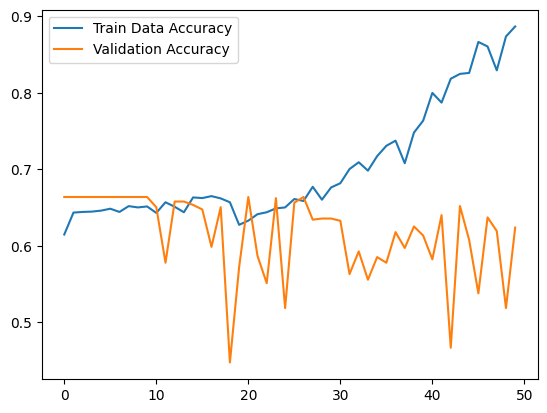

In [ ]:
plt.plot(model_history.history['accuracy'], label = 'Train Data Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

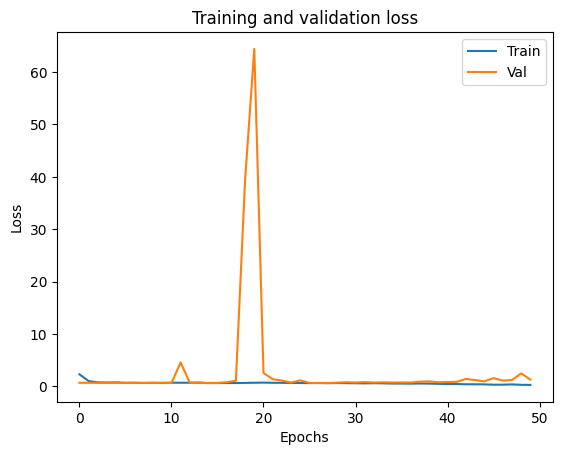

In [ ]:
plt.plot(model_history.history['loss'], label='Train')
plt.plot(model_history.history['val_loss'], label='Val')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on train
train_loss, train_accuracy = model.evaluate(train_data)
print(f'Train accuracy: {train_accuracy}')
print(f'Train loss: {train_loss}')

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.9365 - loss: 0.1710
Train accuracy: 0.9413996338844299
Train loss: 0.1706407517194748


In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.5146 - loss: 1.5220
Test accuracy: 0.5535714030265808
Test loss: 1.360538125038147


In [ ]:
# Evaluate the model on Validation data
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation accuracy: {val_accuracy}')
print(f'Validation loss: {val_loss}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6281 - loss: 1.3370
Validation accuracy: 0.6237037181854248
Validation loss: 1.2893619537353516


11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step


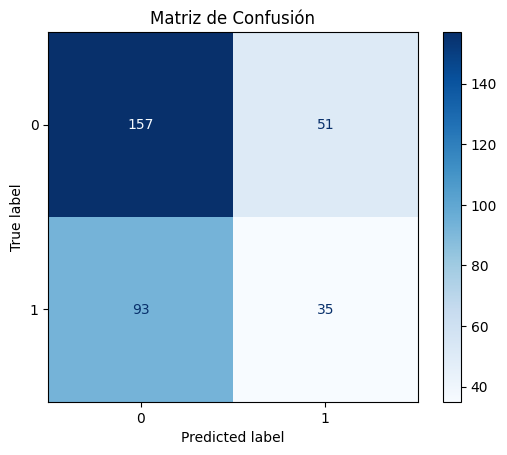

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo sobre los datos de prueba
y_pred_probs = model.predict(test_data)  # Probabilidades
y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir a clases binarias (0 o 1)

# Obtener las etiquetas verdaderas de los datos de prueba
y_true = test_data.classes  # Clases reales del conjunto de prueba

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=test_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()